<a href="https://colab.research.google.com/github/macasallasb/Personal_Projects/blob/main/AgujeroNegroNoKerrdeSitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Init**

In [1]:
#Inicializar e instalar las librerías que se manejarán.
!pip install einsteinpy
import sympy
from sympy import simplify
from sympy.solvers import solve
from sympy import Function, symbols, sin, cos, pi, diff, sqrt
from einsteinpy.symbolic import MetricTensor, EinsteinTensor
import numpy as np
import warnings
import math
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pylab as mp

sympy.init_printing()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 2.4 MB/s eta 0:00:00


In [2]:
# Definición de coordenadas y funciones involucradas en la métrica
syms = sympy.symbols('t r theta phi',real=True)
t, r, theta, phi = syms
a, m, h, alpha, p, L, O, Q, P, eps =symbols("a M h \\alpha \\rho^2 \\Lambda \\Omega Q P \\epsilon",real=True)

# Componentes de la métrica
metric = [[0 for i in range(4)] for i in range(4)]
metric[0][0] = (-Q+a**2*P*sin(theta)**2)*(1+h)/p
metric[1][1] = p*(1+h)/(Q+h*a**2*sin(theta)**2)
metric[2][2] = p/P
metric[3][3] = (P*(r**2+a**2)**2-Q*a**2*sin(theta)**2*(1+h))*sin(theta)**2/p+a**2*sin(theta)**2*(2*h+h*a**2*sin(theta)**2/p)
metric[0][3] = -a*(P*(r**2+a**2)-Q)*(1+h)*sin(theta)**2/p
metric[3][0] = metric[0][3]

g = MetricTensor(metric, syms, name="non-kerr de Sitter accelerating metric")
g.tensor()

⎡             ⎛   2    2       ⎞                                              
⎢     (h + 1)⋅⎝P⋅a ⋅sin (θ) - Q⎠                                              
⎢     ──────────────────────────               0            0                 
⎢               \rho²                                                         
⎢                                                                             
⎢                                        \rho²⋅(h + 1)                        
⎢                  0                    ────────────────    0                 
⎢                                            2      2                         
⎢                                       Q + a ⋅h⋅sin (θ)                      
⎢                                                                             
⎢                                                         \rho²               
⎢                  0                           0          ─────               
⎢                                                   

In [3]:
# Definición de coordenadas y funciones involucradas en la métrica
O1, O2p, O2m=symbols("\\Omega_1 \\omega_{+} \\omega_{-}")
g0 = g.subs(h,(eps*m**3*r)/p**2).subs(O1,1-alpha*r*cos(theta)).subs(Q,(a**2+r**2-2*m*r)*(1-alpha**2*r**2)-(L/3)*(a**2+r**2)*r**2).subs(P,1-2*alpha*m*cos(theta)+(alpha**2+(L/3))*a**2*cos(theta)**2).subs(p,r**2+a**2*cos(theta)**2)
g0.tensor()

⎡     ⎛   3                  ⎞ ⎛         2 ⎛ 2    2⎞                          
⎢     ⎜  M ⋅\epsilon⋅r       ⎟ ⎜\Lambda⋅r ⋅⎝a  + r ⎠    2 ⎛                   
⎢     ⎜────────────────── + 1⎟⋅⎜──────────────────── + a ⋅⎜-2⋅M⋅\alpha⋅cos(θ) 
⎢     ⎜                 2    ⎟ ⎝         3                ⎝                   
⎢     ⎜⎛ 2    2       2⎞     ⎟                                                
⎢     ⎝⎝a ⋅cos (θ) + r ⎠     ⎠                                                
⎢     ────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                            a
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

In [4]:
#Forma analítica del horizonte de eventos
hev=p**2*Q+a**2*sin(theta)**2*m**3*eps*r
hev0=hev.subs(Q,(a**2-2*m*r+r**2)*(1-alpha**2*r**2)+L/3*(a**2+r**2)*r**2).subs(p,r**2+a**2*cos(theta)**2)
hev0=sympy.expand(hev0)
hev0=sympy.simplify(hev0)
hev0

                                                                              
 3           2      2                2  4  3    4                2  2  5    2 
M ⋅\epsilon⋅a ⋅r⋅sin (θ) + 2⋅M⋅\alpha ⋅a ⋅r ⋅cos (θ) + 4⋅M⋅\alpha ⋅a ⋅r ⋅cos (
                                                                              

                                                                              
               2  7        4      4           2  3    2           5   \Lambda⋅
θ) + 2⋅M⋅\alpha ⋅r  - 2⋅M⋅a ⋅r⋅cos (θ) - 4⋅M⋅a ⋅r ⋅cos (θ) - 2⋅M⋅r  + ────────
                                                                              

 6  2    4               4  4    4                 4  4    2                 2
a ⋅r ⋅cos (θ)   \Lambda⋅a ⋅r ⋅cos (θ)   2⋅\Lambda⋅a ⋅r ⋅cos (θ)   2⋅\Lambda⋅a 
───────────── + ───────────────────── + ─────────────────────── + ────────────
  3                       3                        3                         3

  6    2               2  6            8         

In [5]:
#Inicializar la función de la ergosféra
erg=a**2*cos(theta)**2-2*m*r+r**2-(L/3)*((a**2+r**2)*r**2-a**4*(sin(theta)*cos(theta))**2)+alpha*(2*a**2*m*sin(theta)**2*cos(theta)-alpha*(r**2*(a**2-2*m*r)-a**4*(sin(theta)*cos(theta))**2))
erg

                 ⎛   4    2       2       2 ⎛ 2    2⎞⎞                        
         \Lambda⋅⎝- a ⋅sin (θ)⋅cos (θ) + r ⋅⎝a  + r ⎠⎠          ⎛     2    2  
-2⋅M⋅r - ───────────────────────────────────────────── + \alpha⋅⎝2⋅M⋅a ⋅sin (θ
                               3                                              

                                                                              
                  ⎛   4    2       2       2 ⎛          2⎞⎞⎞    2    2       2
)⋅cos(θ) - \alpha⋅⎝- a ⋅sin (θ)⋅cos (θ) + r ⋅⎝-2⋅M⋅r + a ⎠⎠⎠ + a ⋅cos (θ) + r 
                                                                              

In [6]:
#Función auxiliar que se usa mucho a lo largo del código
subs =lambda f,mass,spin,epsilon,alphas,Lambda: f.subs(m,mass).subs(a,spin).subs(eps,epsilon).subs(alpha,alphas).subs(L,Lambda)

In [7]:
#inicializa la variable que guarda los radios del horizonte de eventos
rValues=[]

# **Estructura del agujero negro**

## **Horizonte de eventos**

In [ ]:
#Inicialización de las variables
mVal=1
aVal=0.8
alphaVal=0.01
epsilonVal=0.5
lambdaVal=0.5

In [ ]:
#Generar las distintas ecuaciones a resolver para cada punto en theta
numDeDatos=1 #número de soluciones que queremos calcular, a mayor número de datos más se demora el código
horizonEqs=[]
string=f"$M=${mVal}, $\\alpha=${alphaVal}, $a=${aVal}, $\\epsilon=${epsilonVal}, $\\Lambda =${lambdaVal}"
hev1=subs(hev0,mVal,aVal,epsilonVal,alphaVal,lambdaVal)
thetaValues=np.linspace(0,1,numDeDatos)*math.pi/2
for j in thetaValues:
  horizonEqs.append(hev1.subs(theta,j))

In [ ]:
rValues=[]
thetaValues0=[]
for i in range(len(horizonEqs)):
  #Método que devuelve las soluciones para cada ecuación dependiendo de theta
  sol=list(filter(lambda l:type(l)==sympy.core.numbers.Float, solve(horizonEqs[i],r,check=False)))
  if len(sol)!=0:
    #Dado que el horizonte de eventos corresponde a la zona exterior de las soluciones se toma la solución real que sea mayor
    rValues.append(max(sol))
    thetaValues0=np.append(thetaValues0,thetaValues[i])

thetaValues=thetaValues0

## **Gráficar Horizonte de eventos**

In [ ]:
#Dado que la métrica muestra simetría en phi, se ploteará la figura para 20 puntos en phi
phiValues=np.linspace(0,1,10)*math.pi/2
x,y,z=np.array([]),np.array([]),np.array([])
numb=1
for t in range(len(thetaValues)):
  for i in range(len(phiValues)):
    #Se transforman las coordenadas en coordenadas esféricas
    y=np.append(y,rValues[t]*np.sin(thetaValues[t])*np.sin(phiValues[numb*i]))
    x=np.append(x,rValues[t]*np.sin(thetaValues[t])*np.cos(phiValues[numb*i]))
    z=np.append(z,rValues[t]*np.cos(thetaValues[t]))
    numb*=-1
#Las coordenadas cooresponden a un octante del horizonte de eventos debido a la simetría en el plano x-y y en phi.
x,y,z=np.array([x]),np.array([y]),np.array([z])

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)
No handles with labels found to put in legend.


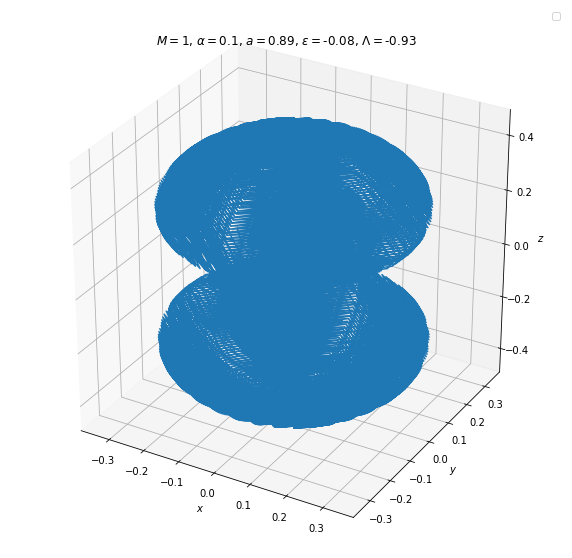

In [ ]:
from matplotlib import cm
#Se inicia el entorno 3D de matplotlib
fig = mp.figure()
ax1 = fig.add_subplot(111,projection='3d')
fig.set_figheight(10)
fig.set_figwidth(10)

#Se grafican los 8 octantes para formar la totalidad del horizonte
mp.title(string)

ax1.plot_wireframe(x, y, z)
ax1.plot_wireframe(-x, -y, -z)
ax1.plot_wireframe(-x, -y, z)
ax1.plot_wireframe(-x, y, -z)
ax1.plot_wireframe(x, -y, -z)
ax1.plot_wireframe(-x, y, z)
ax1.plot_wireframe(x, -y, z)
ax1.plot_wireframe(x, y, -z)

#ax1.view_init(0)

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')

ax1.legend()
mp.show()

## Horizonte de eventos respecto de cada parámetro

In [ ]:
#Se iniciaizan nuevas variables para ejecutar
mVal1=1
aVal1=0.4
epsilonVal1=0
lambdaVal1=[0]

In [ ]:
#Se construye el vector de funciones a resolver
horizonEqs1=[]
alphaVal1=np.linspace(-1,1,100)
counter=0
for i in lambdaVal1:
  horizonEqs1.append([])
  hev2=hev0.subs(m,mVal1).subs(a,aVal1).subs(eps,epsilonVal1).subs(L,lambdaVal1[i]).subs(theta,pi/2)
  for j in alphaVal1:
    horizonEqs1[counter].append(hev2.subs(alpha,j))
  counter+=1

In [ ]:
#Se encuentra el valor del horizonte de eventos para cada valor del parámetro que se quiere variar
rValues1=[]
parameter1=[]
for j in range(len(lambdaVal1)):
  rValues1.append([])
  parameter1.append([])
  for i in range(len(horizonEqs1[0])):
    sol=list(filter(lambda l:type(l)==sympy.core.numbers.Float, solve(horizonEqs1[j][i],r,check=False)))
    if len(sol)!=0:
      rValues1[j].append(max(sol))
      parameter1[j].append(alphaVal1[i])

### Graficar horizontes respecto de variables

In [ ]:
#Se grafican los resultados
mp.plot(np.array(parameter1[0][0:50]),rValues1[0][0:50],"k-")
mp.plot(np.array(parameter1[0][50:-1]),rValues1[0][50:-1],"k-")

mp.xlabel("$\\alpha$")
mp.ylabel("$r_h$")
mp.ylim(0,90)
string1="Radio del horizonte de eventos con $\\theta=\\frac{\\pi}{2}$, M=1, $\\Lambda=0$, $\\epsilon=0$"
mp.title(string1)
mp.legend()
mp.show()

## Ergósfera

In [ ]:
#Se evalúa la ergósfera en los valores definidos antes para cada parámetro
erg1=subs(erg,mVal,aVal,epsilonVal,alphaVal,lambdaVal)
erg1=erg1.expand()

In [ ]:
numDeDatosErgosfera=30
#Número de ángulos donde se va a evaluar la ergósfera
thetas=np.linspace(0,1,numDeDatosErgosfera)*math.pi
ergoEqs=[]
#Diferentes ecuaciones para la ergosfera dado theta
for i in thetas:
  ergoEqs.append(erg1.subs(theta,i))

In [ ]:
#Encuentra las soluciones para la ergósfera
ergoRads=[]
thetas0=[]
sol1=lambda x:sympy.re(x)
for i in range(len(ergoEqs)):
  numbs=solve(ergoEqs[i],r,check=False)
  sol=list(filter(lambda l:sympy.im(l)<1e-20, numbs))
  for j in range(len(sol)):
    sol[j]=sol1(sol[j])
  if len(sol)!=0:
    ergoRads.append(max(sol))
    thetas0=np.append(thetas0,thetas[i])

In [ ]:
#Si el horizonte de eventos ya se calculó plotea el horizonte de eventos junto con la ergósfera
if len(rValues)!=0:
  xh=np.array(rValues)*np.sin(np.array(thetaValues))
  yh=np.array(rValues)*np.cos(np.array(thetaValues))
else:
  xh=[]
  yh=[]

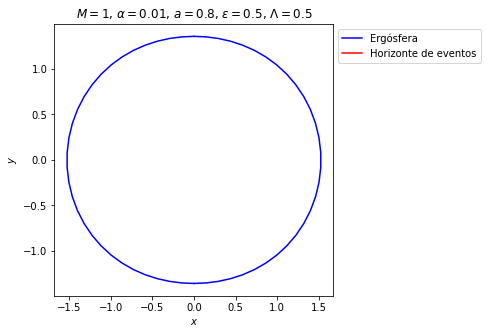

In [ ]:
#Plotear ergosfera y eventos si es posible
x=np.array(ergoRads)*np.sin(np.array(thetas))
y=np.array(ergoRads)*np.cos(np.array(thetas))
mp.figure(figsize=(5,5))
mp.plot(x,y,"b-",label="Ergósfera")
mp.plot(-x,y,"b-")
if len(xh)!=0:
  mp.plot(xh,yh,"r-",label="Horizonte de eventos")
  mp.plot(xh,-yh,"r-")
  mp.plot(-xh,-yh,"r-")
  mp.plot(-xh,yh,"r-")
mp.title(string)
mp.legend(bbox_to_anchor=(1.0, 1))
mp.xlabel("$x$")
mp.ylabel("$y$")
mp.show()

## ISCO y esféra de fotones

###Potenciales y variables necesarias

In [ ]:
#Definicion de los valores de los parametros de los que depende la metrica
mVal=1
alphaVal=0.01
aVal=0.5
epsilonVal=0.5
lambdaVal=0.7
subs0=lambda f:f.subs(m,mVal).subs(a,aVal).subs(alpha,alphaVal).subs(eps,epsilonVal).subs(L,lambdaVal).subs(theta,pi/2)

In [ ]:
g01=subs0(g0)

In [ ]:
# Derivadas de componentes de la métrica para definir la velocidad angular
dr_g00=diff(g01[0][0],r)
dr_g03=diff(g01[3][0],r)
dr_g33=diff(g01[3][3],r)

In [ ]:
#Velocidades angulares co y contrarrotantes
Omega=[simplify((-dr_g03+sqrt((dr_g03)**2-dr_g00*dr_g33))/dr_g33),simplify((-dr_g03-sqrt((dr_g03)**2-dr_g00*dr_g33))/dr_g33)]

In [ ]:
# Definicion de constantes (Energia y momento angular por unidad de masa co y contrarrotantes)
E,Lz=[],[]
for o in Omega:
  E.append((-(g01[0][0]+o*g01[0][3])/sqrt(-g01[0][0]-2*o*g01[0][3]-o**2*g01[3][3])))
  Lz.append(((g01[0][3]+o*g01[3][3])/sqrt(-g01[0][0]-2*o*g01[0][3]-o**2*g01[3][3])))

In [ ]:
#Definición del potencial efectivo y cálculo de su segunda derivada
Veff=[]
for i in range(2):
  Veff.append(((E[i]**2*g01[3][3]+2*E[i]*Lz[i]*g01[0][3]+Lz[i]**2*g01[0][0])/(g01[0][3]**2-g01[0][0]*g01[3][3])-1/g01[1][1]))
dr2_Veff=[]
for j in Veff:
  dr2_Veff.append((diff(diff(j,r),r)))

In [ ]:
# Definición de la ecuación para la esfera de fotones
fotones=[]
for i in Omega:
  fotones.append(g01[0][0]+2*i*g01[0][3]+i**2*g01[3][3])

### ISCO

In [ ]:
# Definicion de arreglos para graficar la funcion de ISCO con respecto al radio
ISCO=[]
for i in dr2_Veff:
  ISCO.append(i)

In [ ]:
# Calculo de la segunda derivada para diferentes radios y filtro de los valores imaginarios bajos en comparacion con su respectiva parte real
rIsco=np.linspace(0,5,50)
valIsco=[]
counter=0
for i in ISCO:
  valIsco.append([])
  for j in rIsco:
    valIsco[counter].append([i.subs(r,j),j])
  counter+=1

valIsco[0]=list(filter(lambda x:type(x[0])!=sympy.core.numbers.NaN and sympy.im(x[0])<1e-10,valIsco[0]))
valIsco[1]=list(filter(lambda x:type(x[0])!=sympy.core.numbers.NaN and sympy.im(x[0])<1e-10,valIsco[1]))
valIsco[0]=list(map(lambda x:[sympy.re(x[0]),x[1]],valIsco[0]))
valIsco[1]=list(map(lambda x:[sympy.re(x[0]),x[1]],valIsco[1]))

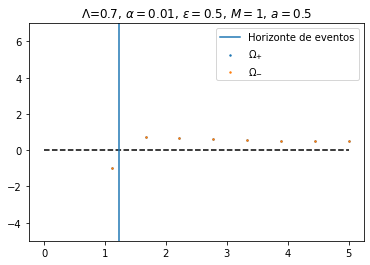

In [ ]:
y,x,y1,x1=[],[],[],[]
for i in valIsco[0]:
  x.append(i[1])
  y.append(i[0])
for j in valIsco[1]:
  x1.append(j[1])
  y1.append(j[0])

mp.title(f"$\\Lambda$={lambdaVal}, $\\alpha=${alphaVal}, $\\epsilon={epsilonVal}$, $M={mVal}$, $a=${aVal}")
mp.plot([0,5],[0,0],"k--")
mp.plot([1.23342728781250,1.23342728781250],[-5,7],label="Horizonte de eventos")
mp.ylim(-5,7)
mp.scatter(x,y,label="$\\Omega_{+}$",s=2)
mp.scatter(x1,y1,label="$\\Omega_{-}$",s=2)
mp.legend()
mp.show()

### Orbita de Fotones

In [ ]:
rFotones=np.linspace(0,5,100)
valFotones=[]
counter=0
for i in fotones:
  valFotones.append([])
  for j in rIsco:
    valFotones[counter].append([i.subs(r,j),j])
  counter+=1

In [ ]:
#Filtro de los valores imaginarios bajos en comparacion con su respectiva parte real
valFotones[0]=list(filter(lambda x:type(x[0])!=sympy.core.numbers.NaN and sympy.im(x[0])<1e-10,valFotones[0]))
valFotones[1]=list(filter(lambda x:type(x[0])!=sympy.core.numbers.NaN and sympy.im(x[0])<1e-10,valFotones[1]))
valFotones[0]=list(map(lambda x:[sympy.re(x[0]),x[1]],valFotones[0]))
valFotones[1]=list(map(lambda x:[sympy.re(x[0]),x[1]],valFotones[1]))

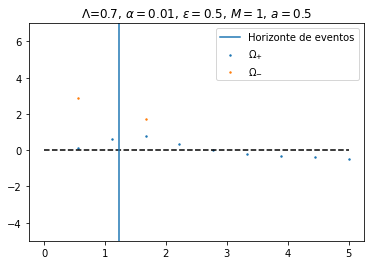

In [ ]:
yf,xf,yf1,xf1=[],[],[],[]
for i in valFotones[0]:
  xf.append(i[1])
  yf.append(i[0])
for j in valFotones[1]:
  xf1.append(j[1])
  yf1.append(j[0])
mp.title(f"$\\Lambda$={lambdaVal}, $\\alpha=${alphaVal}, $\\epsilon={epsilonVal}$, $M={mVal}$, $a=${aVal}")
mp.plot([0,5],[0,0],"k--")
mp.plot([1.23342728781250,1.23342728781250],[-5,7],label="Horizonte de eventos")
mp.ylim(-5,7)
mp.scatter(xf,yf,label="$\\Omega_{+}$",s=2)
mp.scatter(xf1,yf1,label="$\\Omega_{-}$",s=2)
mp.legend()
mp.show()

# **Termodinámica del agujero negro**

## **Area del Horizonte de eventos**

In [ ]:
#Con el cálculo del horizonte de eventos se puede calcular el area de este, para luego calcular la entropía
xa=rValues*np.sin(thetaValues)
ya=rValues*np.cos(thetaValues)
longitud=0
area=0
for i in range(len(xa)-1):
  #Se calcula el area del horizonte de eventos aproximando dos anillos de la solución a un cono truncado y sumando sus areas superficiales
  longitud+=math.sqrt((ya[i]-ya[i+1])**2+(xa[i]-xa[i+1])**2)
  r2=xa[i]
  r1=xa[i+1]
  h=ya[i]-ya[i+1]
  area+=np.pi*(r2**2+r1**2+math.sqrt(h**2+(r1-r2)**2)*(r1+r2))
area*=1/2
print("Longitud de la curva=",longitud,"\\\\ Area del horizonte de eventos=",area,"masa",mVal)
mp.figure(figsize=(5, 5))
mp.plot(xa,ya)
mp.show()

In [ ]:
#Guarda los resultados en un .txt alojado en el drive del autor
rad=open("/content/drive/My Drive/Universidad/Semestre 9/DatosIntTeo/EntropiaFisica3.txt","a")
rad.write(string+"\n")
rad.write("Area = "+str(area)+"\n")
rad.write("Longitud = "+str(longitud)+"\n")
for i in range(len(rValues)):
  rad.write(str(rValues[i])+"\t"+str(thetaValues[i])+"\n")
rad.write("--------------------------------------------------"+"\n")
rad.close()
###No es necesario ejecutar esta celda##

## **Gravedad Superficial**

In [ ]:
#Se definen los intervalos de interes para la gravedad superficial respecto de la masa del agujeero negro
mases=np.linspace(1,40,20)
mases=np.append(mases,np.linspace(41,43,10))
mases=np.append(mases,np.linspace(44,60,10))

In [ ]:
#Se varía para dos valores distintos de epsilon en este caso, pero este mismo método se puede usar para los demás parámetros, salvo la masa.
epsilons=np.array([-10,10])*epsilonVal
rHorizon=[]
#una vez se tienen los parámetros definidos, se calcula el radio del horizonte de eventos en pi/2 para cada valor de masa y parámetro.
for j in range(len(epsilons)):
  rHorizon.append([])
  for i in range(len(mases)):
    eventHorizon=subs(hev0,mases[i],aVal,epsilonVal,alphaVal,lambdaVal).subs(theta,pi/2)
    rHorizon[j].append(max(list(filter(lambda x:type(x)!=sympy.core.add.Add,solve(eventHorizon,r,check=False)))))

In [ ]:
#Se define la gravedad superficial
kappa=(O**2/(2*(1+h)*p))*sympy.diff((a**2-2*m*r+r**2)*(1-alpha*r)-(L/3)*(a**2+r**2)*r**2,r)
kappa=kappa.subs(O,1-alpha*r*cos(theta)).subs(h,eps*m**3*r/p**2).subs(p,r**2+a**2*cos(theta)**2)
kappa

In [ ]:
gSup=[]
#Se calcula cada valor para la gravedad superficial
for j in range(len(epsilons)):
  gSup.append([])
  for i in range(len(mases)):
    gAux=kappa.subs(m,mases[i]).subs(a,aVal).subs(alpha,alphaVal).subs(eps,epsilons[j]).subs(L,lambdaVal).subs(theta,pi/2)
    gSup[j].append(gAux.subs(r,rHorizon[j][i]))
gSup

In [ ]:
#Finalmente se plotea el resultado final
mp.plot([0,60],[0,0],"k--")
sup=23
mp.plot(mases[0:sup],(np.array(gSup[0])/(2*pi))[0:sup],"r-",label=f"$\\epsilon = ${epsilons[0]}")
mp.plot(mases[sup+1:-1],(np.array(gSup[0])/(2*pi))[sup+1:-1],"r-")
mp.plot(mases,np.array(gSup[1])/(2*pi),label=f"$\\epsilon = ${epsilons[1]}")
mp.title(f"$\\Lambda=${lambdaVal}, $a=${aVal}, $\\alpha=${alphaVal}")
mp.xlabel("$M$")
mp.ylabel("$T$")
mp.legend()
mp.show()